# Introduction

The goal of this notebook is to play around with a tool that I find particularly interesting and, potentially, very useful: [Cogram](https://www.cogram.com/).

Cogram is an AI-powered code generator that provides code suggestions in your Jupyter Notebook. 
As we already know, these types of suggestions are nothing more than a Language Model. In particular, Cogram has been trained over a large dataset of code snippets.
More details are in the following paper: [Chen et al, 2021, Evaluating Large Language Models Trained on Code](https://arxiv.org/abs/2107.03374).

If you want to use it yourself, you must sign up to get API access, install Cogram, and connect to the API via the API access code provided. For more detail, please refer to the Cogram Documentation.

I have already completed these steps and configured my environment, so let's play!

## Get Started


I will start with simple code snippets. 

The first thing you need to do in any problem is read the data; let's see if Cogram can suggest how.

In [ ]:
# read a csv called train.csv into a dataframe called train_df
import pandas as pd
train_df = pd.read_csv('train.csv')

In [ ]:
# read a csv called train.csv into a dataframe called test_df
test_df = pd.read_csv('test.csv')


In [ ]:
# generate the X and y objects
X = train_df.drop(columns=['price'])
y = train_df['price']

Cool! No more StackOverflow when you do not remember how to read a CSV in pandas.

Now we need to do something with this data.

## Set up some Machine Learning Classifiers

Now we will see if Cogram can help us create our Machine Learning solution.

In [1]:
# set up a logistic regression classifier called lr
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# fit X and y to the classifier
lr.fit(X, y)

In [ ]:
# predict the test set results
y_pred = lr.predict(test_df)

In [ ]:
# evaluate the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy_score(test_df['price'], y_pred)

Well, not bad.
We have trained a simple Logistic Regression classifier with the training data and evaluated it with the test data.

Please note the context-awareness capabilities of Cogram. It is able to use the variable names already defined in the new suggestions.

## More complex suggestions

So far, we have created a very simplistic model. Let's see to what extent Cogram can provide us with more advanced suggestions.

In [2]:
# Generate a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

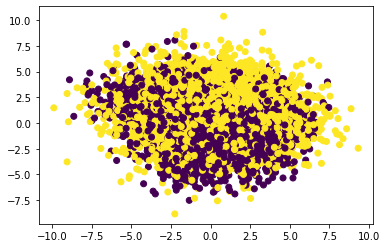

In [3]:
# plot the dataset
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
# create a svm classifier and fit the dataset to it
from sklearn.svm import SVC
svc = SVC()
svc.fit(X, y)

SVC()

In [5]:
# compute the cross-validated accuracy of the classifier
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, y, cv=5)

array([0.9675, 0.9735, 0.9755, 0.9645, 0.9665])

In [ ]:
# test different classification methods and select the one with the best accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()

models = [lr, dtc, rfc, svc]

for model in models:
    score = cross_val_score(model, X, y, cv=5).mean()
    print(f'{model.__class__.__name__}: {score}')

Quite impressive, isn't it? We have been able to create a fully functional ML pipeline from end to end!

## Even more complex suggestions
Now I would like to see whether Cogram is useful for more advanced machine learning steps; e.g., feature selection, pipelining...

In [ ]:
# apply chi2 to select the 20 most important features
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)

In [13]:
# create a grid search for a random forest classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [3, None],
              'max_features': [1, 3, 10],
              'min_samples_split': [2, 3, 10],
              'min_samples_leaf': [1, 3, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid)

In [14]:
# create a classification pipeline with feature selection and pca
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipeline = Pipeline([
    ('feature_selection', SelectKBest(chi2)),
    ('reduce_dim', PCA()),
    ('classify', grid_search)
])

In [15]:
# create a classification pipeline with feature selection and pca and scale the dataset
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(chi2)),
    ('reduce_dim', PCA()),
    ('classify', grid_search)
])


In [9]:
# import Pipeline from sklearn.pipeline
from sklearn.pipeline import Pipeline

In [11]:
# import the needed libraries
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# fit the data to the classification pipeline
pipeline.fit(X, y)

In [ ]:
# and evaluate the pipeline with accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, pipeline.predict(X))

In [ ]:
# and evaluate the pipeline with cross validation accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline, X, y, cv=5)

Cool! 

Here you have your machine learning pipeline! It could not be easier!

## What about NLP?

Let's see if Cogram is useful for Natural Language Processing

In [ ]:
# create a nlp pipeline with a count vectorizer and a tf-idf transformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

But nowadays NLP is synonym of Deep Learning, right?

Could Cogram also generate Deep Learning code?

In [ ]:
# create a nlp classifier using bert
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

In [ ]:
# classify a text example
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute", add_special_tokens=True)).unsqueeze(0)  # Batch size 1
labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
outputs = model(input_ids, labels=labels)
loss, logits = outputs[:2]

Well, not bad. 

It is not fully functional yet, you must install some libraries, but I think that it is a very good start.

Now with some other models beyond text classification

In [ ]:
# create a question answering system
from transformers import BertForQuestionAnswering
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


In [ ]:
# ask for the president of spain
import torch

text = '''
Q: What is the president of Spain?
A: The president of Spain is Pedro Sánchez.
'''

inputs = tokenizer.encode_plus(text, return_tensors='pt')
start_scores, end_scores = model(**inputs)

all_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze())
answer = ' '.join(all_tokens[torch.argmax(start_scores) : torch.argmax(end_scores)+1])
assert answer == 'Pedro Sánchez'

In [ ]:
# translate "NLP is awesome" to Spanish
from transformers import pipeline
translator = pipeline("translation_en_to_es")

translator("NLP is awesome", max_length=40)